In [1]:
#importing modules

import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib as plt

In [2]:
import os
import json
import pandas as pd

def load_json_files(folder_path):
    """
    Loads all JSON files from a given folder into a single pandas DataFrame.

    Parameters:
        folder_path (str): The path to the folder containing JSON files.

    Returns:
        pd.DataFrame: DataFrame containing the combined data from all JSON files.
    """
    all_data = []

    # Iterate through all files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            try:
                with open(file_path, 'r', encoding='utf-8') as file:
                    data = json.load(file)

                    # Ensure the data is a list of records or a single record
                    if isinstance(data, dict):
                        all_data.append(data)
                    elif isinstance(data, list):
                        all_data.extend(data)
                    else:
                        print(f"Skipping {filename}: Unsupported JSON format")
            except Exception as e:
                print(f"Error reading {filename}: {e}")

    # Convert list of dicts to DataFrame
    return pd.DataFrame(all_data)


In [3]:
nasdaq_df = load_json_files('/home/baskar/Desktop/StockPricePred/data/NASDAQ_100')
fmp_df = load_json_files('/home/baskar/Desktop/StockPricePred/data/FMP')

In [4]:
#glimpse of the datasets
nasdaq_df.tail()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
613432,2025-01-27T00:00:00.000Z,373.75,382.4500,359.6600,366.50,3783451,373.75,382.4500,359.6600,366.50,3783451,0.0,1.0
613433,2025-01-28T00:00:00.000Z,408.68,411.2999,372.5700,372.67,8247214,408.68,411.2999,372.5700,372.67,8247214,0.0,1.0
613434,2025-01-29T00:00:00.000Z,397.07,404.3500,390.2201,404.35,4279542,397.07,404.3500,390.2201,404.35,4279542,0.0,1.0
613435,2025-01-30T00:00:00.000Z,396.87,403.0802,390.8500,399.73,2785193,396.87,403.0802,390.8500,399.73,2785193,0.0,1.0
613436,2025-01-31T00:00:00.000Z,398.07,408.1000,397.3500,398.40,3126181,398.07,408.1000,397.3500,398.40,3126181,0.0,1.0


In [5]:
fmp_df.tail()

,symbol,date,calendarYear,period,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,...,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue
10888,CSX,1986-09-30,1986,Q3,0.000000,0.000000,0.000000,NaN,0.0,NaN,...,2.898666,13.749840,0.0,0.0,0.0,-0.352243,2.898666,0.010546,NaN,0.000000
10889,CSX,1986-06-30,1986,Q2,0.000000,0.000000,0.000000,NaN,0.0,NaN,...,3.081750,9.984622,0.0,0.0,0.0,0.216333,3.081750,0.008856,NaN,0.000000
10890,CSX,1986-03-31,1986,Q1,0.000000,0.000000,0.000000,NaN,0.0,NaN,...,3.316567,16.553571,0.0,0.0,0.0,-0.139634,3.316567,0.007821,NaN,0.000000
10891,CSX,1985-12-31,1985,Q4,1.050205,0.830943,0.095799,65.606061,0.0,65.606061,...,2.523333,-2.498100,0.0,0.0,0.0,0.004915,2.523333,0.009587,-1.506674,0.978581
10892,CSX,1985-09-30,1985,Q3,0.000000,0.000000,0.000000,NaN,0.0,NaN,...,2.087370,8.150230,0.0,0.0,0.0,0.000000,2.087370,0.012022,NaN,0.000000


In [6]:
#basic info on PE ratios
print(f'Basic Info : {fmp_df.info()}')
print('\n\n')
print(f'Shape : {fmp_df.shape}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10893 entries, 0 to 10892
Data columns (total 58 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   symbol                              10893 non-null  object 
 1   date                                10893 non-null  object 
 2   calendarYear                        10893 non-null  object 
 3   period                              10893 non-null  object 
 4   currentRatio                        10893 non-null  float64
 5   quickRatio                          10893 non-null  float64
 6   cashRatio                           10893 non-null  float64
 7   daysOfSalesOutstanding              10278 non-null  float64
 8   daysOfInventoryOutstanding          10815 non-null  float64
 9   operatingCycle                      10278 non-null  float64
 10  daysOfPayablesOutstanding           10815 non-null  float64
 11  cashConversionCycle                 10278

In [7]:
#basic info on Prices ratios
print(f'Basic Info : {nasdaq_df.info()}')
print('\n\n')
print(f'Shape : {nasdaq_df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613437 entries, 0 to 613436
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         613437 non-null  object 
 1   close        613437 non-null  float64
 2   high         613437 non-null  float64
 3   low          613437 non-null  float64
 4   open         613437 non-null  float64
 5   volume       613437 non-null  int64  
 6   adjClose     613437 non-null  float64
 7   adjHigh      613437 non-null  float64
 8   adjLow       613437 non-null  float64
 9   adjOpen      613437 non-null  float64
 10  adjVolume    613437 non-null  int64  
 11  divCash      613437 non-null  float64
 12  splitFactor  613437 non-null  float64
dtypes: float64(10), int64(2), object(1)
memory usage: 60.8+ MB
Basic Info : None



Shape : (613437, 13)


In [8]:
#basic statistical analysis
print(f'Statistics of ratios: \n\n {fmp_df.describe()}')

Statistics of ratios: 

        currentRatio    quickRatio     cashRatio  daysOfSalesOutstanding  \
count  10893.000000  10893.000000  10893.000000            10278.000000   
mean       2.533359      2.215011      0.810981               62.015929   
std        3.870984      3.750251      2.248099              586.343776   
min        0.000000      0.000000     -0.056006             -896.803991   
25%        1.115276      0.867109      0.164114               32.101141   
50%        1.851609      1.566191      0.443906               47.297041   
75%        3.104196      2.688517      0.925389               62.871080   
max      221.398793    211.642193    148.849007            44016.197953   

       daysOfInventoryOutstanding  operatingCycle  daysOfPayablesOutstanding  \
count                10815.000000    10278.000000               10815.000000   
mean                    49.626509      114.235300                 105.784802   
std                    996.036828     1178.474034          

In [9]:
#basic statistical analysis
print(f'Statistics of prices: \n\n {nasdaq_df.describe()}')

Statistics of prices: 

                close           high            low           open  \
count  613437.000000  613437.000000  613437.000000  613437.000000   
mean     1350.928252    1366.971984    1334.052841    1350.801673   
std      5347.011428    5402.132968    5287.437571    5346.574885   
min         0.620000       0.620000       0.593800       0.620000   
25%        51.380000      52.250000      50.500000      51.375000   
50%       161.440000     164.000000     158.999921     161.480000   
75%       739.170000     749.000000     729.000000     739.060000   
max    134657.280000  134884.800000  133764.480000  134496.000000   

             volume       adjClose        adjHigh         adjLow  \
count  6.134370e+05  613437.000000  613437.000000  613437.000000   
mean   5.297938e+06      68.141743      69.027742      67.221941   
std    2.076100e+07     187.949652     190.152543     185.678783   
min    0.000000e+00       0.006458       0.006458       0.006185   
25%    4.7874

In [10]:
#counting the missing values in the data
print(f'Ratios : \n\n {fmp_df.isnull().sum()}')
print('\n\n')
print(f'Percentage of null values (ratios) : \n\n {fmp_df.isna().mean() * 100}')

print(f'NASDAQ : \n\n {nasdaq_df.isnull().sum()}')
print('\n\n')
print(f'Percentage of null values (prices) : \n\n {nasdaq_df.isna().mean() * 100}')


Ratios : 

 symbol                                  0
date                                    0
calendarYear                            0
period                                  0
currentRatio                            0
quickRatio                              0
cashRatio                               0
daysOfSalesOutstanding                615
daysOfInventoryOutstanding             78
operatingCycle                        615
daysOfPayablesOutstanding              78
cashConversionCycle                   615
grossProfitMargin                       0
operatingProfitMargin                   0
pretaxProfitMargin                      0
netProfitMargin                         0
effectiveTaxRate                        0
returnOnAssets                          1
returnOnEquity                          1
returnOnCapitalEmployed                 1
netIncomePerEBT                         0
ebtPerEbit                              0
ebitPerRevenue                          0
debtRatio             

In [11]:
def fill_missing_with_neighbor_mean(df):
    # Ensure 'date' is datetime and data is sorted
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values(by=['symbol', 'date']).reset_index(drop=True)

    numeric_cols = df.select_dtypes(include='number').columns

    # Create a copy to modify safely
    df_filled = df.copy()

    for symbol in df['symbol'].unique():
        symbol_mask = df['symbol'] == symbol
        symbol_df = df[symbol_mask].sort_values(by='date').reset_index()

        for col in numeric_cols:
            for i in range(len(symbol_df)):
                val = symbol_df.loc[i, col]
                if pd.isna(val):
                    prev_val = next_val = np.nan

                    # Search backward
                    for j in range(i - 1, -1, -1):
                        prev_val = symbol_df.loc[j, col]
                        if not pd.isna(prev_val):
                            break
                        prev_val = np.nan

                    # Search forward
                    for k in range(i + 1, len(symbol_df)):
                        next_val = symbol_df.loc[k, col]
                        if not pd.isna(next_val):
                            break
                        next_val = np.nan

                    mean_val = np.nanmean([prev_val, next_val])
                    if not np.isnan(mean_val):
                        original_idx = symbol_df.loc[i, 'index']
                        df_filled.at[original_idx, col] = mean_val

    return df_filled


In [12]:
# Assuming 'ratios_df' contains the JSON data loaded into a DataFrame
ratios_df = fill_missing_with_neighbor_mean(fmp_df)

In [13]:
ratios_df.isnull().sum()

symbol                                0
date                                  0
calendarYear                          0
period                                0
currentRatio                          0
quickRatio                            0
cashRatio                             0
daysOfSalesOutstanding                0
daysOfInventoryOutstanding            0
operatingCycle                        0
daysOfPayablesOutstanding             0
cashConversionCycle                   0
grossProfitMargin                     0
operatingProfitMargin                 0
pretaxProfitMargin                    0
netProfitMargin                       0
effectiveTaxRate                      0
returnOnAssets                        0
returnOnEquity                        0
returnOnCapitalEmployed               0
netIncomePerEBT                       0
ebtPerEbit                            0
ebitPerRevenue                        0
debtRatio                             0
debtEquityRatio                       0


In [ ]:
def compare_filled_values(original_df, filled_df):
    # Ensure dataframes are aligned
    assert original_df.shape == filled_df.shape
    numeric_cols = original_df.select_dtypes(include='number').columns
    comparisons = {}

    for col in numeric_cols:
        # Find rows where original was NaN and now has a filled value
        mask = original_df[col].isna() & filled_df[col].notna()

        if mask.sum() > 0:
            changed_rows = filled_df[mask][['symbol', 'date', col]].copy()
            changed_rows['filled_value'] = filled_df.loc[mask, col]
            changed_rows['original_value'] = original_df.loc[mask, col]
            comparisons[col] = changed_rows.head(5)

    return comparisons


In [15]:
original_df = fmp_df.copy()
#Fill nulls
filled_df = fill_missing_with_neighbor_mean(fmp_df)
#Compare changes
changes = compare_filled_values(original_df, filled_df)
#print changes
for col, examples in changes.items():
    print(f"\nField: {col}")
    print(examples[['symbol', 'date', 'original_value', 'filled_value']])



Field: daysOfSalesOutstanding
    symbol       date  original_value  filled_value
134   AAPL 2019-03-30             NaN     40.765664
135   AAPL 2019-06-29             NaN     44.279953
136   AAPL 2019-09-28             NaN     64.371643
138   AAPL 2020-03-28             NaN     47.346732
139   AAPL 2020-06-27             NaN     48.366424

Field: daysOfInventoryOutstanding
    symbol       date  original_value  filled_value
816    AEP 1986-03-31             NaN      0.000000
818    AEP 1986-09-30             NaN      0.000000
901    AEP 2007-06-30             NaN     80.603969
902    AEP 2007-09-30             NaN     59.361702
903    AEP 2007-12-31             NaN     71.394586

Field: operatingCycle
    symbol       date  original_value  filled_value
134   AAPL 2019-03-30             NaN     52.910218
135   AAPL 2019-06-29             NaN     53.271377
136   AAPL 2019-09-28             NaN     73.673629
138   AAPL 2020-03-28             NaN     55.694950
139   AAPL 2020-06-27      

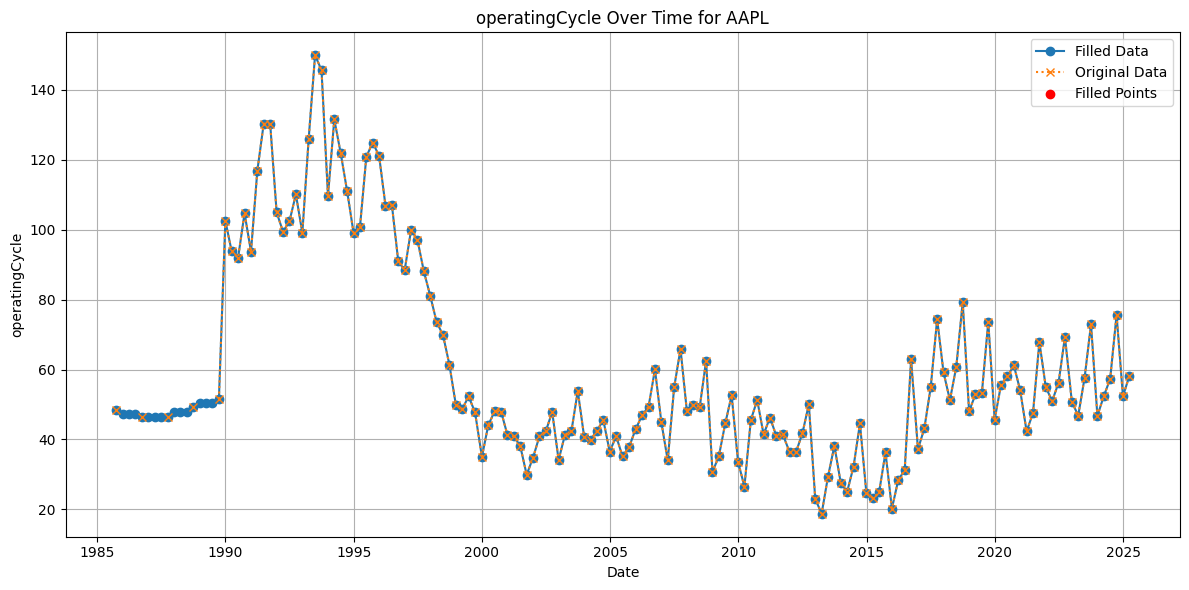

In [ ]:
# Assume fmp_df is already loaded and 'ratios_df' is the filled version
original_df = fmp_df.copy()
filled_df = ratios_df.copy()

# Filter for a specific stock, e.g., ABNB
symbol = "AAPL"
metric = "operatingCycle"

orig_abnb = original_df[original_df['symbol'] == symbol].copy()
filled_abnb = filled_df[filled_df['symbol'] == symbol].copy()

# Convert date if not already
orig_abnb['date'] = pd.to_datetime(orig_abnb['date'])
filled_abnb['date'] = pd.to_datetime(filled_abnb['date'])

# Ensure sorted
orig_abnb.sort_values(by='date', inplace=True)
filled_abnb.sort_values(by='date', inplace=True)

# Identify filled points
replaced_mask = orig_abnb[metric].isna() & filled_abnb[metric].notna()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(orig_abnb['date'], filled_abnb[metric], label='Filled Data', marker='o')
plt.plot(orig_abnb['date'], orig_abnb[metric], label='Original Data', linestyle='dotted', marker='x')
plt.scatter(orig_abnb.loc[replaced_mask, 'date'],
            filled_abnb.loc[replaced_mask, metric],
            color='red', label='Filled Points', zorder=5)

plt.title(f"{metric} Over Time for {symbol}")
plt.xlabel("Date")
plt.ylabel(metric)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [17]:
import pandas as pd

# Ensure date is in datetime format and sorted
fmp_df['date'] = pd.to_datetime(fmp_df['date'])
fmp_df = fmp_df.sort_values(by=['symbol', 'date'])

# Forward fill missing values within each symbol group
fmp_df_filled = fmp_df.groupby('symbol').ffill()

# Optional: if you want to keep non-numeric columns like 'symbol', merge them back
fmp_df_filled[['symbol']] = fmp_df[['symbol']]

# Done!


In [18]:
import pandas as pd

# Ensure proper datetime and sorting
fmp_df['date'] = pd.to_datetime(fmp_df['date'])
fmp_df = fmp_df.sort_values(by=['symbol', 'date'])

# Store original copy
original_df = fmp_df.copy()

# Forward fill NaNs grouped by symbol
filled_df_v2 = fmp_df.groupby('symbol').ffill()

# To keep 'symbol' column (not filled)
filled_df_v2['symbol'] = original_df['symbol']

# Find numeric columns
numeric_cols = original_df.select_dtypes(include='number').columns

# Compare and print up to 5 examples per column
for col in numeric_cols:
    mask = original_df[col].isna() & filled_df_v2[col].notna()
    changed_rows = original_df[mask].copy()
    
    if not changed_rows.empty:
        print(f"Column: {col}\n")
        comparison = pd.DataFrame({
            'symbol': changed_rows['symbol'],
            'date': changed_rows['date'],
            'original_value': original_df.loc[mask, col],
            'filled_value': filled_df_v2.loc[mask, col]
        })
        print(comparison.head(5).to_string(index=False))


Column: daysOfSalesOutstanding

symbol       date  original_value  filled_value
  AAPL 1985-12-31             NaN     48.371979
  AAPL 1986-03-31             NaN     48.371979
  AAPL 1986-06-30             NaN     48.371979
  AAPL 1986-12-31             NaN     46.356695
  AAPL 1987-03-31             NaN     46.356695
Column: daysOfInventoryOutstanding

symbol       date  original_value  filled_value
   APP 2020-06-30             NaN      0.000000
   APP 2020-09-30             NaN      0.000000
   ARM 2022-12-31             NaN      0.000000
  AVGO 2009-01-31             NaN     60.645161
   BKR 2016-06-30             NaN      0.000000
Column: operatingCycle

symbol       date  original_value  filled_value
  AAPL 1985-12-31             NaN     48.371979
  AAPL 1986-03-31             NaN     48.371979
  AAPL 1986-06-30             NaN     48.371979
  AAPL 1986-12-31             NaN     46.356695
  AAPL 1987-03-31             NaN     46.356695
Column: daysOfPayablesOutstanding

symbol   

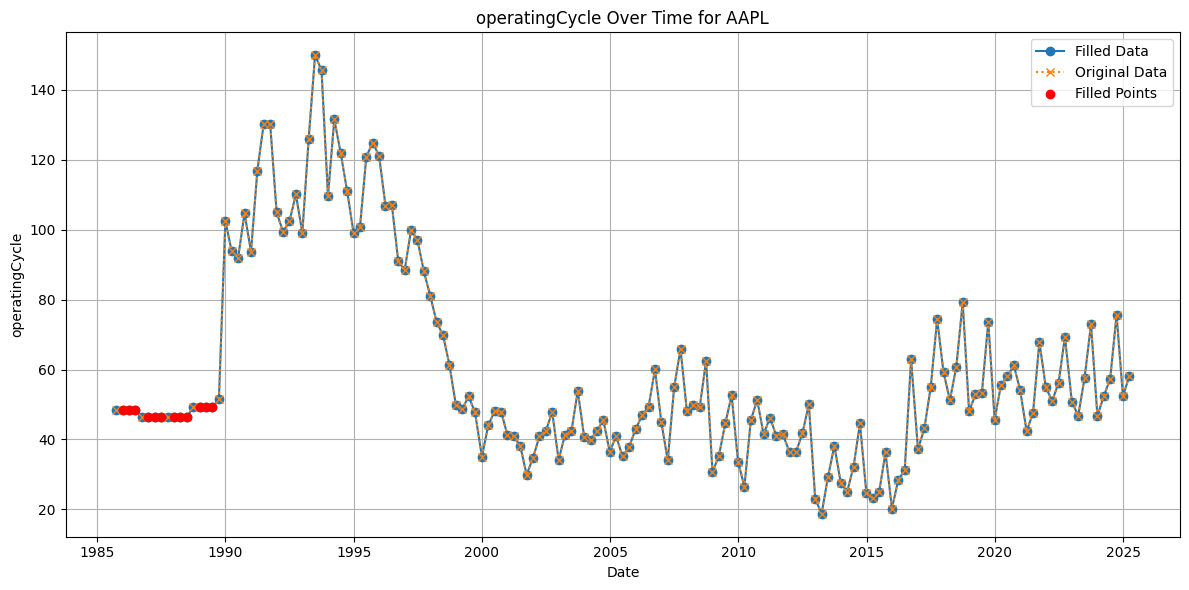

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assume fmp_df is already loaded and 'ratios_df' is the filled version
original_df = fmp_df.copy()
filled_df = filled_df_v2.copy()

# Filter for a specific stock, e.g., ABNB
symbol = "AAPL"
metric = "operatingCycle"

orig_abnb = original_df[original_df['symbol'] == symbol].copy()
filled_abnb = filled_df[filled_df['symbol'] == symbol].copy()

# Convert date if not already
orig_abnb['date'] = pd.to_datetime(orig_abnb['date'])
filled_abnb['date'] = pd.to_datetime(filled_abnb['date'])

# Ensure sorted
orig_abnb.sort_values(by='date', inplace=True)
filled_abnb.sort_values(by='date', inplace=True)

# Identify filled points
replaced_mask = orig_abnb[metric].isna() & filled_abnb[metric].notna()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(orig_abnb['date'], filled_abnb[metric], label='Filled Data', marker='o')
plt.plot(orig_abnb['date'], orig_abnb[metric], label='Original Data', linestyle='dotted', marker='x')
plt.scatter(orig_abnb.loc[replaced_mask, 'date'],
            filled_abnb.loc[replaced_mask, metric],
            color='red', label='Filled Points', zorder=5)

plt.title(f"{metric} Over Time for {symbol}")
plt.xlabel("Date")
plt.ylabel(metric)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()